In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

In [22]:

df_data_virtual_purchases = pd.read_csv('data_virtual_purchases.csv')
df_data_virtual_purchases.head()

,user_id,activity_date,product_group,n_purchases,gold_spend
0,303932,15/04/2024,Weapon,3,15
1,295960,15/04/2024,Weapon,5,25
2,275717,15/04/2024,Weapon,2,18
3,272271,15/04/2024,Weapon,9,370
4,303640,15/04/2024,Weapon,4,20


In [16]:
# Basic Descriptive Statistics
# To get a quick overview of the data, let's compute some descriptive statistics for the numerical columns:
# Get descriptive statistics
print(df_data_virtual_purchases.describe())

             user_id   n_purchases    gold_spend
count   69123.000000  69123.000000  69123.000000
mean   290805.264442      2.239284     95.859540
std     10753.678909      2.003506    789.868785
min    272070.000000      1.000000      0.000000
25%    281485.000000      1.000000     10.000000
50%    290808.000000      1.000000     20.000000
75%    300069.000000      3.000000     45.000000
max    309402.000000     93.000000  60489.000000


In [43]:
# Check for any missing values and data types
print(df_data_virtual_purchases.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69123 entries, 0 to 69122
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        69123 non-null  int64         
 1   activity_date  69123 non-null  datetime64[ns]
 2   product_group  69123 non-null  object        
 3   n_purchases    69123 non-null  int64         
 4   gold_spend     69123 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.6+ MB
None


In [17]:
# Analyze User Purchases
# Let's analyze the number of purchases made by users and the amount of gold spent:

# Analyze the distribution of the number of purchases
print(df_data_virtual_purchases['n_purchases'].describe())

# Analyze the distribution of gold spend
print(df_data_virtual_purchases['gold_spend'].describe())

# Calculate total purchases and total gold spent
total_purchases = df_data_virtual_purchases['n_purchases'].sum()
total_gold_spent = df_data_virtual_purchases['gold_spend'].sum()

print(f"Total Purchases: {total_purchases}")
print(f"Total Gold Spent: {total_gold_spent}")

count    69123.000000
mean         2.239284
std          2.003506
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         93.000000
Name: n_purchases, dtype: float64
count    69123.000000
mean        95.859540
std        789.868785
min          0.000000
25%         10.000000
50%         20.000000
75%         45.000000
max      60489.000000
Name: gold_spend, dtype: float64
Total Purchases: 154786
Total Gold Spent: 6626099


In [18]:
# Group by Product Group
# To understand which product groups are more popular and generate more revenue, we can group the data by product_group:
# Group by product_group and calculate the sum of purchases and gold spent
grouped_data = df_data_virtual_purchases.groupby('product_group').agg(
    total_purchases=('n_purchases', 'sum'),
    total_gold_spend=('gold_spend', 'sum'),
    average_gold_per_purchase=('gold_spend', 'mean')
).reset_index()

print(grouped_data)

  product_group  total_purchases  total_gold_spend  average_gold_per_purchase
0         Boost            17425           2322821                 238.091533
1          Gear             1113           2047214                2511.919018
2        Weapon           136248           2256064                  38.530947


In [19]:
# Time-Based Analysis
# If the dataset contains multiple dates, you can analyze the data over time to identify trends. Since the sample data shows only one date, consider checking the dataset for more unique dates:

# Convert 'activity_date' to datetime format if not already done
df_data_virtual_purchases['activity_date'] = pd.to_datetime(df_data_virtual_purchases['activity_date'], format='%d/%m/%Y')

# Analyze the data over time if there are multiple dates
purchases_over_time = df_data_virtual_purchases.groupby('activity_date').agg(
    total_purchases=('n_purchases', 'sum'),
    total_gold_spend=('gold_spend', 'sum')
).reset_index()

print(purchases_over_time)

   activity_date  total_purchases  total_gold_spend
0     2024-03-01             2174             97866
1     2024-03-02             2302            148085
2     2024-03-03             2678            184339
3     2024-03-04             2405             73923
4     2024-03-05             2260             71383
..           ...              ...               ...
57    2024-04-27              752             43030
58    2024-04-28              857             79499
59    2024-04-29              709             39211
60    2024-04-30              593             31718
61    2024-05-01              662             64936

[62 rows x 3 columns]


In [20]:
# Identify High-Value Users
# Identify users who spend the most on purchases, which could be important for targeted marketing or special offers:

# Identify high-value users
high_value_users = df_data_virtual_purchases.groupby('user_id').agg(
    total_purchases=('n_purchases', 'sum'),
    total_gold_spend=('gold_spend', 'sum')
).reset_index()

# Sort by total_gold_spend in descending order to find top spenders
high_value_users = high_value_users.sort_values(by='total_gold_spend', ascending=False)

print(high_value_users.head(10))  # Display top 10 high-value users

       user_id  total_purchases  total_gold_spend
3982    279199              768            483263
7062    284707              315            112981
19342   306713               28            110502
4053    279328              109            102994
4902    280804              282             94524
11246   292230              137             89561
48      272164               13             66403
10394   290698              173             58858
5764    282387              129             57313
3246    277867               41             54728


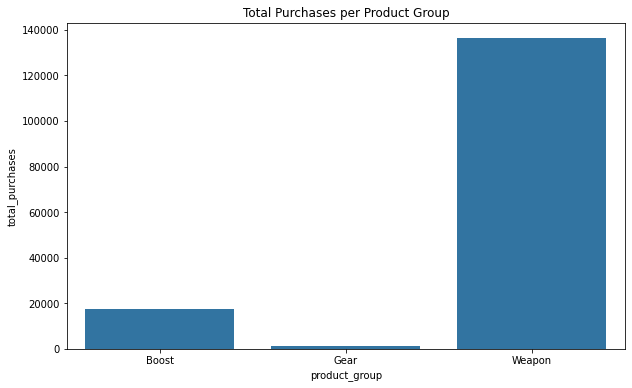

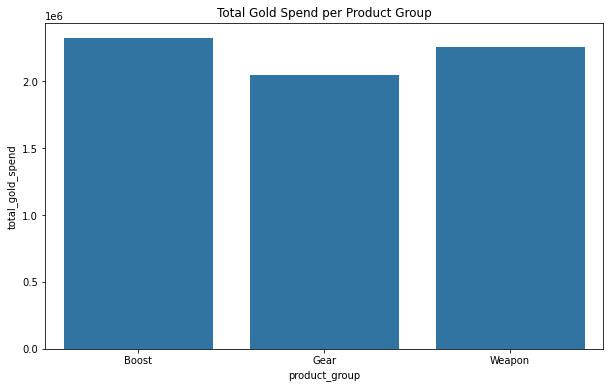

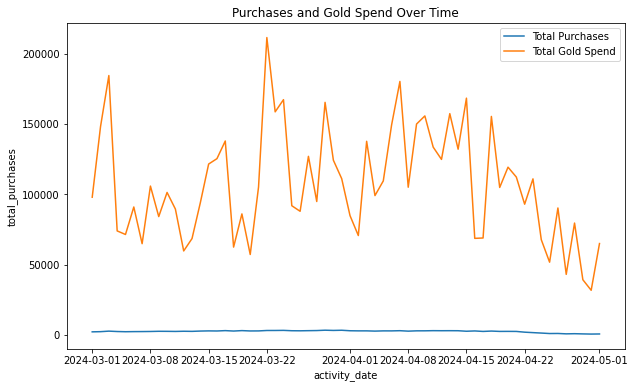

In [21]:
# Visualize Insights

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for total purchases and gold spend per product group
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='product_group', y='total_purchases')
plt.title('Total Purchases per Product Group')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='product_group', y='total_gold_spend')
plt.title('Total Gold Spend per Product Group')
plt.show()

# Line plot for purchases over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=purchases_over_time, x='activity_date', y='total_purchases', label='Total Purchases')
sns.lineplot(data=purchases_over_time, x='activity_date', y='total_gold_spend', label='Total Gold Spend')
plt.title('Purchases and Gold Spend Over Time')
plt.show()

8. Draw Actionable Insights
Based on the analysis above, you can draw actionable insights like:

Popular Product Groups: Identify which product groups are most popular or generate the most revenue.
High-Value Users: Find the top spenders and consider targeted marketing or special offers for these users.
Purchasing Trends Over Time: If more dates are available, identify trends in purchases and spending over time to optimize marketing strategies or in-game events.
By following these steps, you'll be able to gain a better understanding of user behavior and make data-driven decisions to enhance your strategy.

In [24]:
df_data_virtual_purchases.head()

,user_id,activity_date,product_group,n_purchases,gold_spend
0,303932,2024-04-15,Weapon,3,15
1,295960,2024-04-15,Weapon,5,25
2,275717,2024-04-15,Weapon,2,18
3,272271,2024-04-15,Weapon,9,370
4,303640,2024-04-15,Weapon,4,20


In [35]:
# Convert 'activity_date' to datetime format
df_data_virtual_purchases['activity_date'] = pd.to_datetime(df_data_virtual_purchases['activity_date'], format='%d/%m/%Y')

# Calculate total purchase value and total number of purchases per user
user_purchase_summary_virtual = df_data_virtual_purchases.groupby('user_id').agg(
    total_spend_virtual=('gold_spend', 'sum'),
    total_no_purchases_virtual=('n_purchases', 'count'),
    first_gold_spend_date_virtual = ('activity_date','min'),
    last_gold_spend_date_virtual=('activity_date','max'),
    number_of_purchase_days_virtual=('activity_date','nunique')
).reset_index()

# Calculate average purchase per user
user_purchase_summary_virtual['average_spend_per_purchase_virtual'] = round(user_purchase_summary_virtual['total_spend_virtual'] / user_purchase_summary_virtual['total_no_purchases_virtual'],2)

# Display the average purchase value per user
user_purchase_summary_virtual

,user_id,total_spend_virtual,total_no_purchases_virtual,first_gold_spend_date_virtual,last_gold_spend_date_virtual,number_of_purchase_days_virtual,average_spend_per_purchase_virtual
0,272070,163,6,2024-03-17,2024-04-04,6,27.17
1,272071,27,2,2024-04-03,2024-04-12,2,13.50
2,272077,17,2,2024-03-23,2024-03-24,2,8.50
3,272079,68,1,2024-04-15,2024-04-15,1,68.00
4,272082,36,2,2024-04-02,2024-04-04,2,18.00
...,...,...,...,...,...,...,...
20854,309398,5,1,2024-03-14,2024-03-14,1,5.00
20855,309399,34,2,2024-03-01,2024-03-11,2,17.00
20856,309400,5,1,2024-03-27,2024-03-27,1,5.00
20857,309401,46,3,2024-03-31,2024-04-03,3,15.33


In [41]:
user_purchase_summary_virtual.to_csv('new dataset\\user_purchase_summary_virtual.csv',index=False)